In [1]:
%matplotlib inline

import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import seaborn as sns

from IPython.core.pylabtools import figsize

In [2]:
figsize(15, 9)
figsize(15, 9)

In [44]:
data_dir = './data'

TICK_SIZE=14

def isnum(x):
    try:
        float(x)
        return True
    except:
        return False

def get_year_cols(df):
    return [c for c in df.columns.tolist() if len(c) == 4 and isnum(c)]

def plot_series(field_prefix, text_height):
    merged.set_index('YEAR')[[field_prefix + '_gut', field_prefix + '_cdc']].plot(linewidth=3)
    
    locs, labels = plt.yticks()
    plt.yticks(locs, [str(int(l)) for l in locs], fontsize=TICK_SIZE)
    plt.xticks(fontsize=TICK_SIZE)
    
    plt.xlabel('')
    
    plt.axvspan(1989, 1993, alpha=0.2, color='red')
    plt.text(1990, text_height, 'Bush', fontsize=TICK_SIZE)
    plt.axvspan(1993, 2001, alpha=0.2, color='blue')
    plt.text(1994, text_height, 'Clinton', fontsize=TICK_SIZE)
    plt.axvspan(2001, 2009, alpha=0.2, color='red')
    plt.text(2002, text_height, 'Bush Jr.', fontsize=TICK_SIZE)
    plt.axvspan(2009, 2017, alpha=0.2, color='blue')
    plt.text(2010, text_height, 'Obama', fontsize=TICK_SIZE)
    plt.axvspan(2017, 2021, alpha=0.2, color='red')
    plt.text(2018, text_height, 'Trump', fontsize=TICK_SIZE)
    
    plt.xlim([1989, 2021])

def plot_party_dists(field):
    sns.distplot(merged[merged['Party'] == 'D'][field], label='D')
    sns.distplot(merged[merged['Party'] == 'R'][field], label='R')
    plt.legend()
    plt.show()

In [4]:
presidents_data = os.path.join(data_dir, 'USPresidentsData.csv')
prez_df = pd.read_csv(presidents_data)
prez_df = prez_df[prez_df['YEAR'] >= 1989]
print(len(prez_df), len(set(prez_df['YEAR'])))
prez_df.head()

30 30


,PRESIDENT,YEAR
204,George Bush,1989
205,George Bush,1990
206,George Bush,1991
207,George Bush,1992
208,Bill Clinton,1993


In [5]:
abortion_data = os.path.join(data_dir, 'abortions.csv')
cdc_df = pd.read_csv(abortion_data).sort_values(by='Year')
cdc_df['YEAR'] = cdc_df['Year']
cdc_df['abortions'] = cdc_df['Number of abortions\nreported to CDC']
cdc_df['abortions_per_1000_births'] = cdc_df['Induced abortions\nratio per 1,000\nlive births']
del cdc_df['Year']
del cdc_df['Number of abortions\nreported to CDC']
del cdc_df['Induced abortions\nratio per 1,000\nlive births']
del cdc_df['CDC Abortion\nSurveillance Report']
cdc_df['diff_raw'] = cdc_df['abortions'].diff()
cdc_df['diff_per_1000_births'] = cdc_df['abortions_per_1000_births'].diff()

cdc_df.dropna(inplace=True)
print(len(cdc_df), len(set(cdc_df['YEAR'])))
cdc_df.head()

46 46


,YEAR,abortions,abortions_per_1000_births,diff_raw,diff_per_1000_births
1,1971,485816,137,292325.0,85.0
2,1972,586760,180,100944.0,43.0
3,1973,615831,196,29071.0,16.0
4,1974,763476,242,147645.0,46.0
5,1975,854853,272,91377.0,30.0


In [6]:
pop_data = os.path.join(data_dir, 'API_SP.POP.TOTL_DS2_en_csv_v2_1120881.csv')
pop_df = pd.read_csv(pop_data)
pop_df = pop_df[pop_df['Country Name'] == 'United States']
year_cols = get_year_cols(pop_df)
pop_df = pop_df.melt(id_vars=['Country Code'], value_vars=year_cols).dropna()
pop_df['YEAR'] = pop_df['variable'].astype(int)
pop_df['pop'] = pop_df['value']
del pop_df['Country Code']
del pop_df['variable']
del pop_df['value']
pop_df.head()

,YEAR,pop
0,1960,180671000.0
1,1961,183691000.0
2,1962,186538000.0
3,1963,189242000.0
4,1964,191889000.0


In [7]:
fert_data = os.path.join(data_dir, 'API_SP.DYN.CBRT.IN_DS2_en_csv_v2_1120906.csv')
fert_df = pd.read_csv(fert_data)
fert_df = fert_df[fert_df['Country Name'] == 'United States']
year_cols = get_year_cols(fert_df)
fert_df = fert_df.melt(id_vars=['Country Code'], value_vars=year_cols).dropna()
fert_df['YEAR'] = fert_df['variable'].astype(int)
fert_df['births_per_1000'] = fert_df['value']
del fert_df['Country Code']
del fert_df['variable']
del fert_df['value']
fert_df.head()

,YEAR,births_per_1000
0,1960,23.7
1,1961,23.3
2,1962,22.4
3,1963,21.7
4,1964,21.1


In [8]:
guttmacher_data = os.path.join(data_dir, 'guttmacher.csv')
gutt_df = pd.read_csv(guttmacher_data).sort_values(by='year')
gutt_df['YEAR'] = gutt_df['year']
gutt_df['abortions'] = gutt_df['guttmacher']
del gutt_df['year']
del gutt_df['guttmacher']
gutt_df = gutt_df.merge(pop_df, on='YEAR', how='inner').merge(fert_df, on='YEAR', how='inner')
gutt_df['births'] = gutt_df['births_per_1000'] * gutt_df['pop'] / 1000.0
gutt_df['abortions_per_1000_births'] = gutt_df['abortions'] * 1000.0 / gutt_df['births']
del gutt_df['pop']
del gutt_df['births_per_1000']
del gutt_df['births']
gutt_df['diff_raw'] = gutt_df['abortions'].diff()
gutt_df['diff_per_1000_births'] = gutt_df['abortions_per_1000_births'].diff()
gutt_df.dropna(inplace=True)
gutt_df.head()

,YEAR,abortions,abortions_per_1000_births,diff_raw,diff_per_1000_births
1,1974,898570,283.904857,153960.0,46.484613
2,1975,1034170,327.974153,135600.0,44.069296
3,1976,1179300,370.463332,145130.0,42.489180
4,1977,1316700,395.927495,137400.0,25.464163
5,1978,1409600,422.190774,92900.0,26.263279


In [9]:
party_df = pd.DataFrame({
    'PRESIDENT': ['George Bush', 'Bill Clinton', 'George W. Bush', 'Barack Obama', 'Donald J. Trump'],
    'Party': ['R', 'D', 'R', 'D', 'R']
})
party_df

,PRESIDENT,Party
0,George Bush,R
1,Bill Clinton,D
2,George W. Bush,R
3,Barack Obama,D
4,Donald J. Trump,R


In [10]:
merged = \
    prez_df.merge(
        gutt_df,
        on='YEAR',
        how='inner'
    ).merge(
        party_df,
        on='PRESIDENT',
        how='inner'
    ).merge(
        cdc_df,
        on='YEAR',
        how='left',
        suffixes=('_gut', '_cdc')
    )

cdc_raw_recalc = []
cdc_per_recalc = []
cdc_diff_recalc = []
cdc_diff_per_recalc = []

min_raw = -301766.0
min_per = -40.0
min_raw_found = False
min_per_found = False
for _, row in merged.iterrows():
    year = row['YEAR']
    raw_cdc = row['abortions_cdc']
    per_cdc = row['abortions_per_1000_births_cdc']
    diff_cdc = row['diff_raw_cdc']
    diff_per_cdc = row['diff_per_1000_births_cdc']
    
    if diff_cdc == min_raw:
        min_raw_found = True
        diff_cdc = 0.0
    
    if diff_per_cdc == min_per:
        diff_per_cdc = 0.0
    
    if not min_raw_found:
        new_raw = raw_cdc
    else:
        new_raw = raw_cdc - min_raw
    
    if not min_per_found:
        
        new_per = per_cdc
    else:
        new_per = per_cdc - min_per
        
    
    cdc_raw_recalc.append(new_raw)
    cdc_per_recalc.append(new_per)
    cdc_diff_recalc.append(diff_cdc)
    cdc_diff_per_recalc.append(diff_per_cdc)

merged['abortions_cdc'] = cdc_raw_recalc
merged['abortions_per_1000_births_cdc'] = cdc_per_recalc
merged['diff_raw_cdc'] = cdc_diff_recalc
merged['diff_per_1000_births_cdc'] = cdc_diff_per_recalc

merged.head()

,PRESIDENT,YEAR,abortions_gut,abortions_per_1000_births_gut,diff_raw_gut,diff_per_1000_births_gut,Party,abortions_cdc,abortions_per_1000_births_cdc,diff_raw_cdc,diff_per_1000_births_cdc
0,George Bush,1989,1566900,387.096143,-23850.0,-19.538956,R,1396658.0,346.0,25373.0,-6.0
1,George Bush,1990,1608600,385.875313,41700.0,-1.220830,R,1429247.0,345.0,32589.0,-1.0
2,George Bush,1991,1556510,379.794784,-52090.0,-6.080529,R,1388937.0,339.0,-40310.0,-6.0
3,George Bush,1992,1528930,377.241482,-27580.0,-2.553302,R,1359145.0,335.0,-29792.0,-4.0
4,Bill Clinton,1993,1495000,373.492981,-33930.0,-3.748501,D,1330414.0,321.0,-28731.0,-14.0


In [11]:
merged.drop('YEAR', axis=1) \
.groupby('Party') \
.agg({
    'diff_raw_gut': 'mean',
    'diff_raw_cdc': 'mean',
    'diff_per_1000_births_gut': 'mean',
    'diff_per_1000_births_cdc': 'mean',
})

,diff_raw_gut,diff_raw_cdc,diff_per_1000_births_gut,diff_per_1000_births_cdc
Party,,,,
D,-34636.875000,-25124.812500,-7.312755,-6.062500
R,-12445.714286,-3670.916667,-4.434317,-2.416667


In [12]:
merged\
.groupby('PRESIDENT') \
.agg({
    'diff_raw_gut': 'mean',
    'diff_raw_cdc': 'mean',
    'diff_per_1000_births_gut': 'mean',
    'diff_per_1000_births_cdc': 'mean',
    'YEAR': 'min'
}).sort_values(by='YEAR')

,diff_raw_gut,diff_raw_cdc,diff_per_1000_births_gut,diff_per_1000_births_cdc,YEAR
PRESIDENT,,,,,
George Bush,-15455.00,-3035.000,-7.348404,-4.250,1989
Bill Clinton,-26992.50,-24988.000,-6.761844,-6.125,1993
George W. Bush,-12580.00,-3988.875,-4.797260,-1.500,2001
Barack Obama,-42281.25,-25261.625,-7.863666,-6.000,2009
Donald J. Trump,-5890.00,NaN,2.845629,NaN,2017


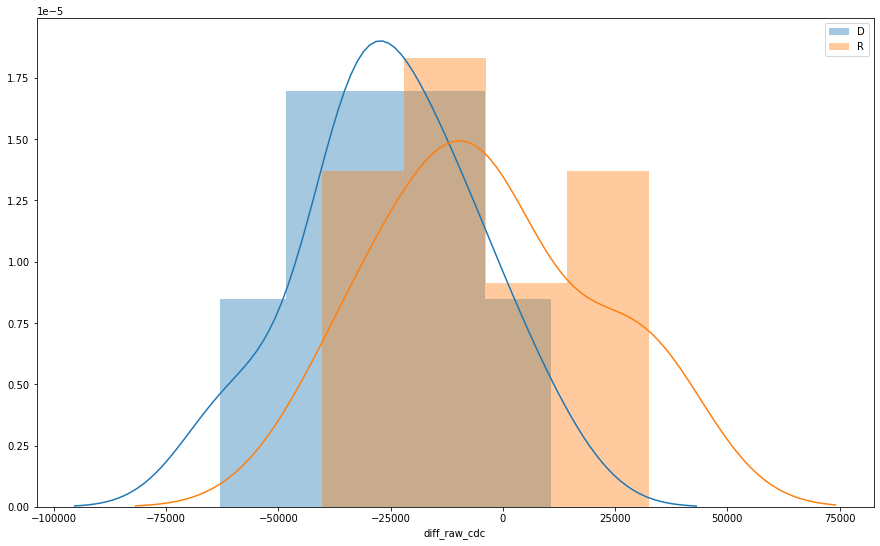

In [37]:
plot_party_dists('diff_raw_cdc')

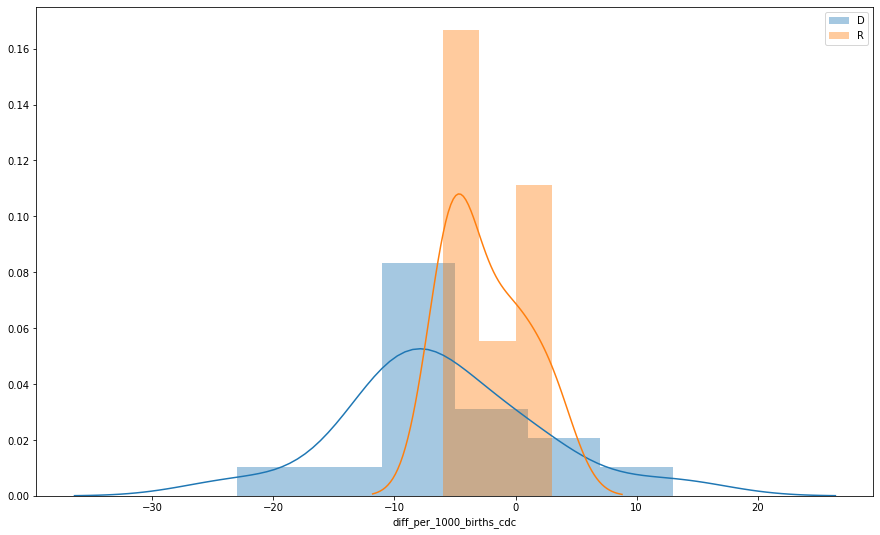

In [36]:
plot_party_dists('diff_per_1000_births_cdc')

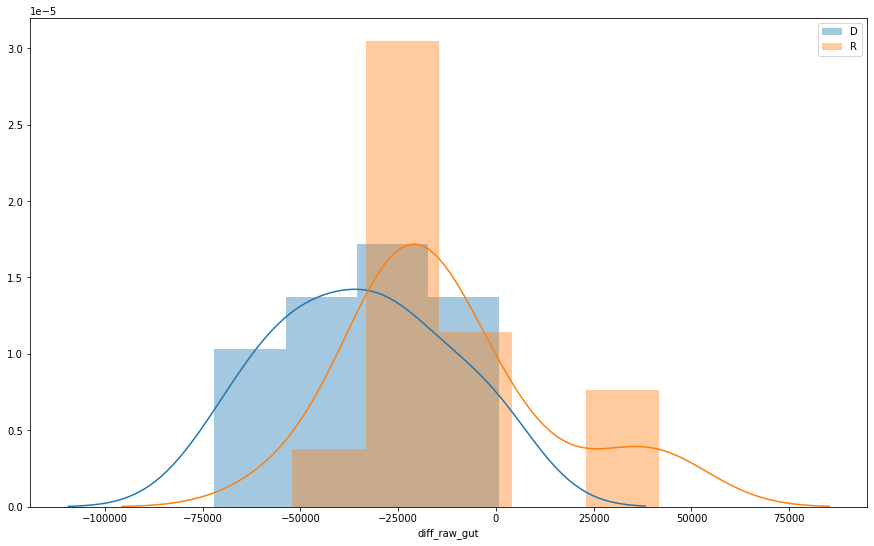

In [35]:
plot_party_dists('diff_raw_gut')

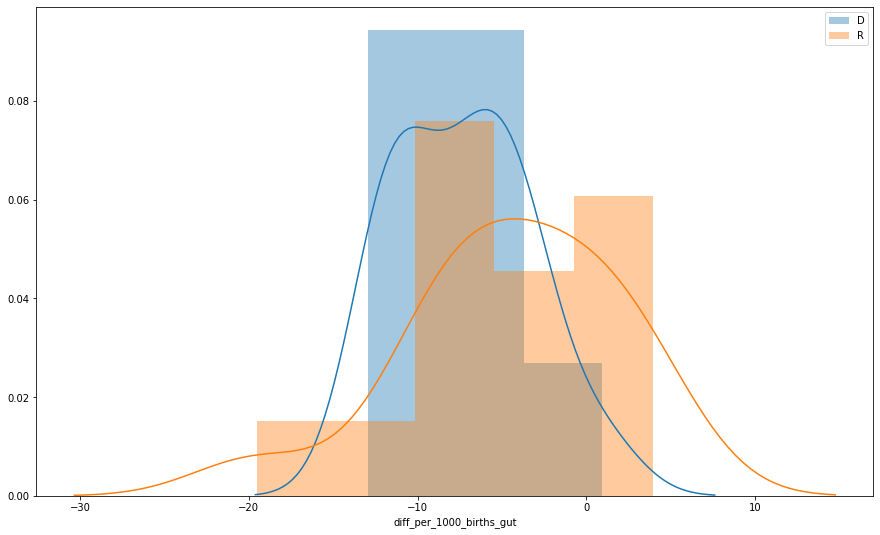

In [34]:
plot_party_dists('diff_per_1000_births_gut')

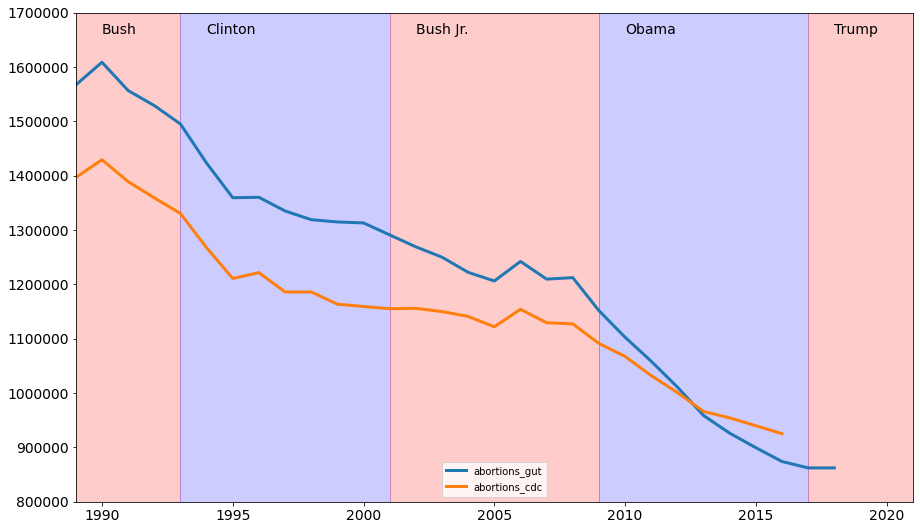

In [45]:
plot_series('abortions', 1_660_000)
# plt.title('Abortions Per Year', fontsize=20)

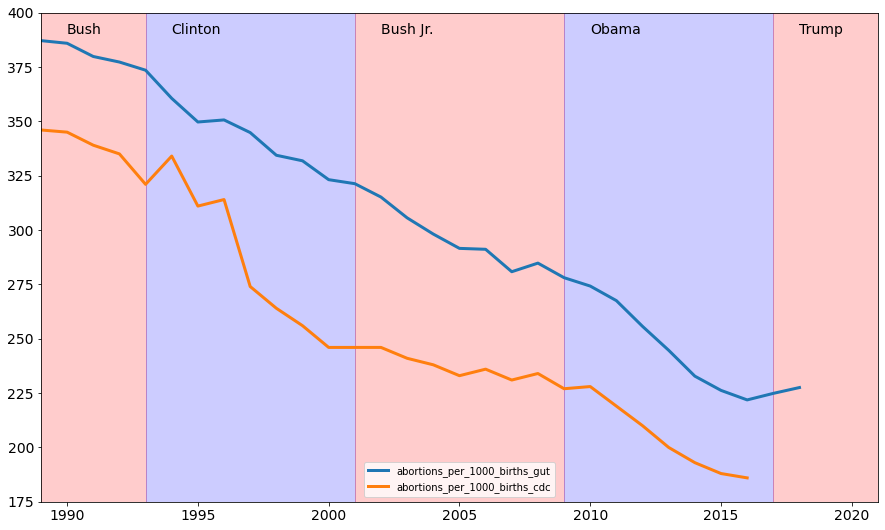

In [46]:
plot_series('abortions_per_1000_births', 390)
# plt.title('Yearly Abortions Per 1000 Births', fontsize=20)